# Xoak basic examples

Those examples show how to use `xoak` for indexing irrelgularly spaced data with spherical coordinates (lat, lon) using a ball-tree structure with the haversine distance metric.

Thanks to Xarray's advanced indexing, `xoak` supports (lat, lon) coordinates stored as arrays of any number of dimension (1, 2, ..., n-d). There are some constraints, though (not really limitations but things to be aware of):


- Indexers (selectors) must be xarray objects!
- The coordinates used to build the index must all have the same dimension(s) (same order).
- Indexers provided in .xoak.sel() must all have the same dimensions.
- Indexers must be provided in .xoak.sel() for every coordinate used to build the index (i.e., both latitude and longitude in the examples below).


In [1]:
import numpy as np
import xarray as xr
import xoak

This shows the indexes that are supported by xoak. Below we'll use the `geo_balltree` index.

In [2]:
xoak.indexes

<IndexRegistry (2 indexes)>
balltree
geo_balltree

## Example 1

2-d coordinates (e.g., NEMO), 1-d indexers (e.g., ship track)

In [3]:
shape = (100, 100)
lat = np.random.uniform(-90, 90, size=shape)
lon = np.random.uniform(-180, 180, size=shape)

field = lat + lon


ds_2d = xr.Dataset(
    coords={'lat': (('x', 'y'), lat), 'lon': (('x', 'y'), lon)},
    data_vars={'field': (('x', 'y'), field)},
)

ds_2d

<xarray.Dataset>
Dimensions:  (x: 100, y: 100)
Coordinates:
    lat      (x, y) float64 50.45 52.98 6.907 -89.19 ... 44.31 -11.33 15.67 -9.3
    lon      (x, y) float64 154.4 -99.74 49.09 -79.22 ... 103.5 7.588 140.9
Dimensions without coordinates: x, y
Data variables:
    field    (x, y) float64 204.9 -46.76 56.0 -168.4 ... 69.79 92.15 23.26 131.6

In [4]:
ds_2d.xoak.set_index(['lat', 'lon'], 'geo_balltree')

In [5]:
ds_indexer_1d = xr.Dataset({
    'latitude': ('points', np.random.uniform(-90, 90, size=50)),
    'longitude': ('points', np.random.uniform(-180, 180, size=50))
})

ds_sel = ds_2d.xoak.sel(
    lat=ds_indexer_1d.latitude,
    lon=ds_indexer_1d.longitude
)

ds_sel

<xarray.Dataset>
Dimensions:  (points: 50)
Coordinates:
    lat      (points) float64 48.52 -10.86 -69.43 ... -36.65 -16.72 -84.88
    lon      (points) float64 2.692 152.1 -132.2 147.6 ... -31.5 -148.2 -123.5
Dimensions without coordinates: points
Data variables:
    field    (points) float64 51.21 141.2 -201.7 147.6 ... -68.15 -164.9 -208.4

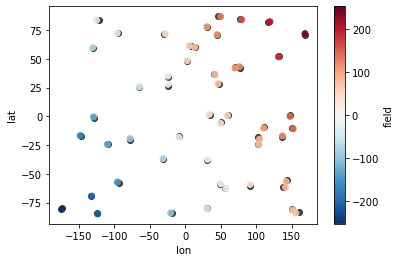

In [6]:
ds_indexer_1d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);

## Example 2

2-d coordinates (e.g., NEMO), 2-d indexers (e.g., another model grid?)

In [7]:
ds_indexer_2d = xr.Dataset({
    'latitude': (('x1', 'y1'), np.random.uniform(-90, 90, size=(20, 50))),
    'longitude': (('x1', 'y1'), np.random.uniform(-180, 180, size=(20, 50)))
})

ds_sel = ds_2d.xoak.sel(
    lat=ds_indexer_2d.latitude,
    lon=ds_indexer_2d.longitude
)

ds_sel

<xarray.Dataset>
Dimensions:  (x1: 20, y1: 50)
Coordinates:
    lat      (x1, y1) float64 40.01 -11.4 -20.83 7.373 ... -77.95 -11.85 -25.02
    lon      (x1, y1) float64 -64.04 -154.7 96.29 ... -21.38 -44.47 -100.5
Dimensions without coordinates: x1, y1
Data variables:
    field    (x1, y1) float64 -24.03 -166.1 75.46 ... -99.33 -56.32 -125.5

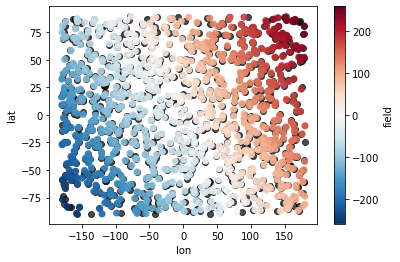

In [8]:
ds_indexer_2d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);

## Example 3

1-d coordinates (e.g., FESOM2), 1-d indexers

In [9]:
lat = np.random.uniform(-90, 90, size=10000)
lon = np.random.uniform(-180, 180, size=10000)

field = lat + lon


ds_1d = xr.Dataset(
    coords={'lat': (('nodes'), lat), 'lon': (('nodes'), lon)},
    data_vars={'field': (('nodes'), field)},
)

ds_1d

<xarray.Dataset>
Dimensions:  (nodes: 10000)
Coordinates:
    lat      (nodes) float64 -6.609 52.34 -39.36 -44.66 ... -55.66 -34.23 -70.85
    lon      (nodes) float64 -177.1 -47.01 94.4 -38.02 ... 9.832 -93.45 -171.4
Dimensions without coordinates: nodes
Data variables:
    field    (nodes) float64 -183.7 5.334 55.04 -82.68 ... -45.82 -127.7 -242.2

In [10]:
ds_1d.xoak.set_index(['lat', 'lon'], 'geo_balltree')

In [11]:
ds_sel = ds_1d.xoak.sel(
    lat=ds_indexer_1d.latitude,
    lon=ds_indexer_1d.longitude
)

ds_sel

<xarray.Dataset>
Dimensions:  (points: 50)
Coordinates:
    lat      (points) float64 48.23 -12.16 -69.45 1.477 ... -37.02 -17.54 -84.37
    lon      (points) float64 2.689 151.5 -132.7 147.6 ... -31.23 -145.9 -123.5
Dimensions without coordinates: points
Data variables:
    field    (points) float64 50.92 139.3 -202.2 149.1 ... -68.25 -163.4 -207.9

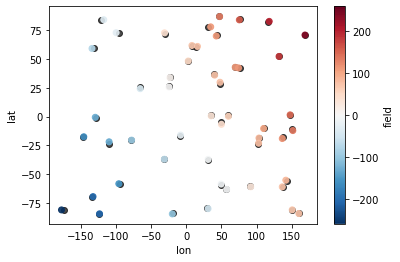

In [12]:
ds_indexer_1d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);

## Example 4

1-d coordinates (e.g., FESOM2), 2-d indexers

In [13]:
ds_sel = ds_1d.xoak.sel(
    lat=ds_indexer_2d.latitude,
    lon=ds_indexer_2d.longitude
)

ds_sel

<xarray.Dataset>
Dimensions:  (x1: 20, y1: 50)
Coordinates:
    lat      (x1, y1) float64 40.15 -11.63 -18.99 11.76 ... -76.58 -12.73 -23.44
    lon      (x1, y1) float64 -64.65 -154.1 95.49 ... -19.21 -44.74 -100.7
Dimensions without coordinates: x1, y1
Data variables:
    field    (x1, y1) float64 -24.5 -165.7 76.5 -0.6217 ... -95.79 -57.47 -124.2

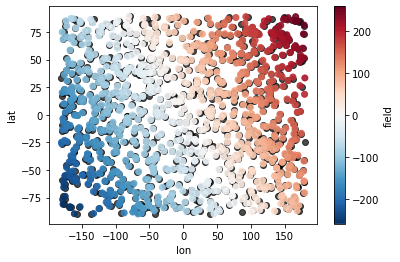

In [14]:
ds_indexer_2d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);

## Working with chunked coordinates (dask arrays)

Xoak supports chunked coordinates for either or both index points and query points.

Let's first create chunks for the index points and set a `geo_balltree` index.

In [15]:
ds_1d_chunked = ds_1d.chunk(5000)

ds_1d_chunked

<xarray.Dataset>
Dimensions:  (nodes: 10000)
Coordinates:
    lat      (nodes) float64 dask.array<chunksize=(5000,), meta=np.ndarray>
    lon      (nodes) float64 dask.array<chunksize=(5000,), meta=np.ndarray>
Dimensions without coordinates: nodes
Data variables:
    field    (nodes) float64 dask.array<chunksize=(5000,), meta=np.ndarray>

In [16]:
ds_1d_chunked.xoak.set_index(['lat', 'lon'], 'geo_balltree')

A balltree structure is here constructed for each chunk:

In [17]:
ds_1d_chunked.xoak.index

Let's also chunk the query point data

In [18]:
ds_indexer_1d_chunked = ds_indexer_1d.chunk(25)

ds_indexer_1d_chunked

<xarray.Dataset>
Dimensions:    (points: 50)
Dimensions without coordinates: points
Data variables:
    latitude   (points) float64 dask.array<chunksize=(25,), meta=np.ndarray>
    longitude  (points) float64 dask.array<chunksize=(25,), meta=np.ndarray>

Queries are performed in parallel using Dask.

In [19]:
ds_sel = ds_1d_chunked.xoak.sel(
    lat=ds_indexer_1d_chunked.latitude,
    lon=ds_indexer_1d_chunked.longitude
)

ds_sel

/Users/bbovy/miniconda3/envs/xoak_dev/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing with an out-of-order index is generating 13 times more chunks
  return self.array[key]


<xarray.Dataset>
Dimensions:  (points: 50)
Coordinates:
    lat      (points) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon      (points) float64 dask.array<chunksize=(2,), meta=np.ndarray>
Dimensions without coordinates: points
Data variables:
    field    (points) float64 dask.array<chunksize=(2,), meta=np.ndarray>

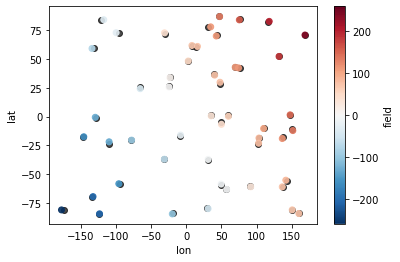

In [20]:
ds_indexer_1d.plot.scatter(x='longitude', y='latitude', c='k', alpha=0.7);
ds_sel.plot.scatter(x='lon', y='lat', hue='field', alpha=0.9);